In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_4 = pd.read_excel("Data Sets/Data Set 4.xlsx")
data_4.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
3,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY


In [3]:
data_4.shape

(18565, 10)

In [4]:
round(data_4.describe(),2).transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,18565.0,-119.57,2.00,-124.35,-121.80,-118.50,-118.01,-114.31
latitude,18565.0,35.63,2.14,32.54,33.93,34.26,37.71,41.95
housing_median_age,18565.0,28.62,12.56,1.00,18.00,29.00,37.00,52.00
total_rooms,18565.0,2634.03,2195.92,2.00,1442.00,2123.00,3141.00,39320.00
total_bedrooms,18376.0,537.71,424.13,2.00,295.00,434.00,646.00,6445.00
population,18565.0,1426.22,1142.57,3.00,786.00,1166.00,1725.00,35682.00
households,18565.0,499.45,384.55,2.00,279.00,408.00,603.00,6082.00
median_income,18565.0,3.87,1.90,0.50,2.56,3.53,4.74,15.00
median_house_value,18565.0,206617.79,115447.10,14999.00,119300.00,179400.00,264400.00,500001.00


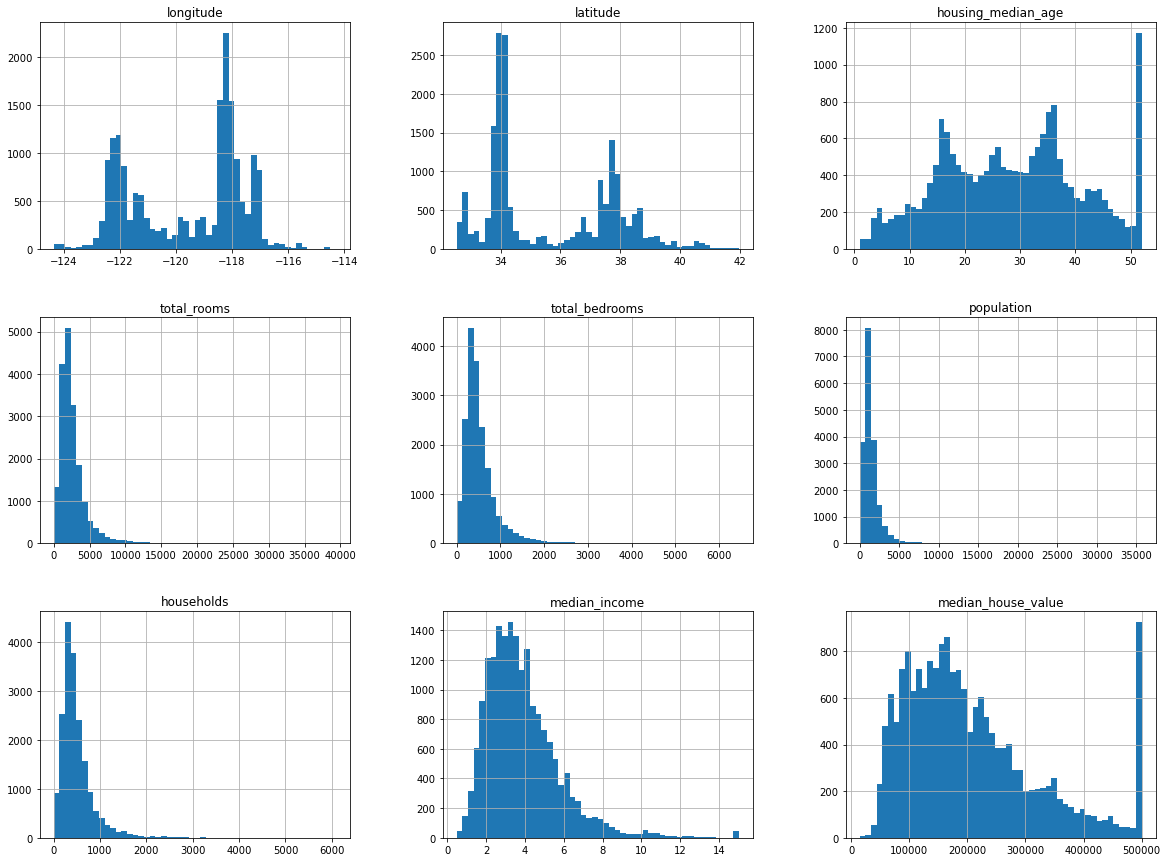

In [5]:
data_4.hist(bins=50,figsize=(20,15))
plt.show()

In [6]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18376 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


As we can see all the columns have complete columns except for total_rooms which has 18376 non-null values against the total of 18565 non-null elements. We can replace this with something else. We can take any of the following approaches:
- Replace by the average values
- Take the ratio of mean total bedrooms to mean total rooms for non null values and multiply the ratio by the number of rooms

We will be taking the second approach. 

In [7]:
mean_total_rooms = round(data_4.loc[data_4.total_bedrooms.isnull()==False,'total_rooms'].mean(),0)
print(f"Average number of total rooms in non null columns {mean_total_rooms}")
mean_total_bedrooms = round(data_4.loc[data_4.total_bedrooms.isnull()==False,'total_bedrooms'].mean(),0)
print(f"Average number of total bed rooms in non null columns {mean_total_bedrooms}")
print(f"Ratio of the number of bedrooms to number of total rooms = {mean_total_bedrooms/mean_total_rooms}")

Average number of total rooms in non null columns 2635.0
Average number of total bed rooms in non null columns 538.0
Ratio of the number of bedrooms to number of total rooms = 0.20417457305502845


Now we multiply the number of rooms in null columns of total bedrooms with 0.20418 and round it to arrive at the total number of bedrooms in the null columns.

In [8]:
data_4.loc[data_4.total_bedrooms.isnull(),'total_bedrooms'] = round(data_4.loc[data_4.total_bedrooms.isnull(),
                                                                         'total_rooms']*mean_total_bedrooms/mean_total_rooms,0)

In [9]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18565 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


Now we can see there is no null column in the data and all the data points are complete. Next step will be creation of dummy variables from ```ocean_proximities``` which is a categorical variables. 

In [10]:
data_4_dummies = pd.get_dummies(data_4,
                                columns= data_4.select_dtypes('object').columns,
                               drop_first = True)

In [11]:
data_4_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   18565 non-null  float64
 1   latitude                    18565 non-null  float64
 2   housing_median_age          18565 non-null  int64  
 3   total_rooms                 18565 non-null  int64  
 4   total_bedrooms              18565 non-null  float64
 5   population                  18565 non-null  int64  
 6   households                  18565 non-null  int64  
 7   median_income               18565 non-null  float64
 8   median_house_value          18565 non-null  int64  
 9   ocean_proximity_INLAND      18565 non-null  uint8  
 10  ocean_proximity_ISLAND      18565 non-null  uint8  
 11  ocean_proximity_NEAR BAY    18565 non-null  uint8  
 12  ocean_proximity_NEAR OCEAN  18565 non-null  uint8  
dtypes: float64(4), int64(5), uint8(

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Now remember we cannot standardize the variables before train-test-split, because we will be carrying the impact of train dataset into test dataset. Therefore, we will be splitting the data into train and test before running the ```StandardScaler```

In [13]:
x_variables = data_4_dummies.loc[:,data_4_dummies.columns!='median_house_value']
y_variables = data_4_dummies.loc[:,data_4_dummies.columns == 'median_house_value']

In [14]:
print(y_variables.head())
print(x_variables.head())

   median_house_value
0              452600
1              358500
2              342200
3              269700
4              299200
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  ocean_proximity_INLAND  \
0         322         126         8.3252                       0   
1        2401        1138         8.3014                       0   
2         565         259         3.8462                       0   
3         413         193         4.0368                       0   
4        1094         514         3.6591                       0   

   ocean

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_variables,y_variables, test_size = 0.20, random_state = 1)

Now we standardize the columns. However, we will not be standardizing the dummy variables because their values are 0/1 already. 

In [16]:
x_train.loc[:,[col for col in x_train.columns if 'ocean_proximity' not in col ]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
11184,-115.84,33.49,20,1660,379.0,637,250,2.0347
4211,-118.35,34.07,48,890,255.0,434,232,3.6111
11874,-117.70,34.05,24,2834,470.0,1815,471,4.7357
10170,-117.94,33.78,34,2627,468.0,1409,450,4.7731
14536,-122.55,37.79,32,2131,625.0,1229,572,2.9201
...,...,...,...,...,...,...,...,...
10955,-117.06,33.78,17,2813,565.0,1345,488,2.5847
17289,-122.65,38.47,24,2268,330.0,847,296,3.8580
5192,-118.25,34.15,15,3712,1005.0,1888,890,3.6875
12172,-117.32,34.16,9,711,139.0,316,152,4.0156


In [17]:
x_scaler = StandardScaler()
x_train_scaled = x_train.copy(deep = True)

In [18]:
x_train_scaled.loc[:,
                   [col for col in x_train_scaled.columns 
                    if 'ocean_proximity' not in col]]= x_scaler.fit_transform(x_train_scaled.loc[:,
                                   [col for col in x_train_scaled.columns 
                                    if 'ocean_proximity' not in col ]])

In [19]:
x_train_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,14852.0,1.808171e-15,1.000034,-2.351954,-1.112283,0.533144,0.784564,2.621667
latitude,14852.0,-1.309423e-15,1.000034,-1.441975,-0.797681,-0.643611,0.971793,2.946693
housing_median_age,14852.0,-2.822652e-17,1.000034,-2.195862,-0.843743,0.031157,0.667448,1.860494
total_rooms,14852.0,-2.822652e-17,1.000034,-1.180703,-0.534386,-0.231341,0.222445,16.393226
total_bedrooms,14852.0,-3.348909e-18,1.000034,-1.255477,-0.567850,-0.245086,0.255431,13.813841
population,14852.0,-5.525699e-17,1.000034,-1.224101,-0.552366,-0.228525,0.253372,29.421441
households,14852.0,-3.277146e-17,1.000034,-1.283105,-0.565546,-0.236343,0.270321,14.354026
median_income,14852.0,-2.631285e-16,1.000034,-1.786924,-0.693216,-0.169493,0.468553,5.908157
ocean_proximity_INLAND,14852.0,3.173983e-01,0.465480,0.000000,0.000000,0.000000,1.000000,1.000000
ocean_proximity_ISLAND,14852.0,2.019930e-04,0.014211,0.000000,0.000000,0.000000,0.000000,1.000000


In [20]:
x_test_scaled = x_test.copy(deep = True)
x_test_scaled.loc[:,
                   [col for col in x_test_scaled.columns 
                    if 'ocean_proximity' not in col]]= x_scaler.fit_transform(x_test_scaled.loc[:,
                                   [col for col in x_test_scaled.columns 
                                    if 'ocean_proximity' not in col ]])

In [21]:
x_test_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,3713.0,-7.109255e-16,1.000135,-2.426175,-1.087535,0.539040,0.776459,2.488908
latitude,3713.0,9.290829e-16,1.000135,-1.452635,-0.791336,-0.644906,0.984724,2.949727
housing_median_age,3713.0,8.180905e-17,1.000135,-2.126967,-0.769993,0.028227,0.666803,1.864133
total_rooms,3713.0,6.315085e-17,1.000135,-1.278386,-0.582262,-0.241868,0.267732,8.804281
total_bedrooms,3713.0,-6.889184e-17,1.000135,-1.302639,-0.586230,-0.244028,0.265582,9.977718
population,3713.0,-2.105028e-17,1.000135,-1.335269,-0.596289,-0.227275,0.299616,10.480795
households,3713.0,-4.975521e-17,1.000135,-1.337406,-0.590582,-0.241701,0.284347,10.036668
median_income,3713.0,-4.401423e-17,1.000135,-1.734041,-0.671724,-0.186198,0.430921,5.734113
ocean_proximity_INLAND,3713.0,3.250741e-01,0.468466,0.000000,0.000000,0.000000,1.000000,1.000000
ocean_proximity_ISLAND,3713.0,5.386480e-04,0.023206,0.000000,0.000000,0.000000,0.000000,1.000000


Now we have scaled the relevant columns, we can start running the model. We also need to scale the output columns as well. 

In [22]:
y_train_scaled = y_train.copy(deep = True)
y_train_scaled.loc[:,:]= x_scaler.fit_transform(y_train_scaled)

In [23]:
y_train_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
median_house_value,14852.0,4.018690e-17,1.000034,-1.664481,-0.755757,-0.233794,0.505852,2.545965


In [24]:
y_test_scaled = y_test.copy(deep = True)
y_test_scaled.loc[:,:] = x_scaler.fit_transform(y_test_scaled)

In [25]:
y_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
median_house_value,3713.0,206165.682736,116468.35107,14999.0,118300.0,177200.0,262900.0,500001.0


In [26]:
y_test_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
median_house_value,3713.0,5.262571e-17,1.000135,-1.641583,-0.754518,-0.248734,0.487188,2.523217


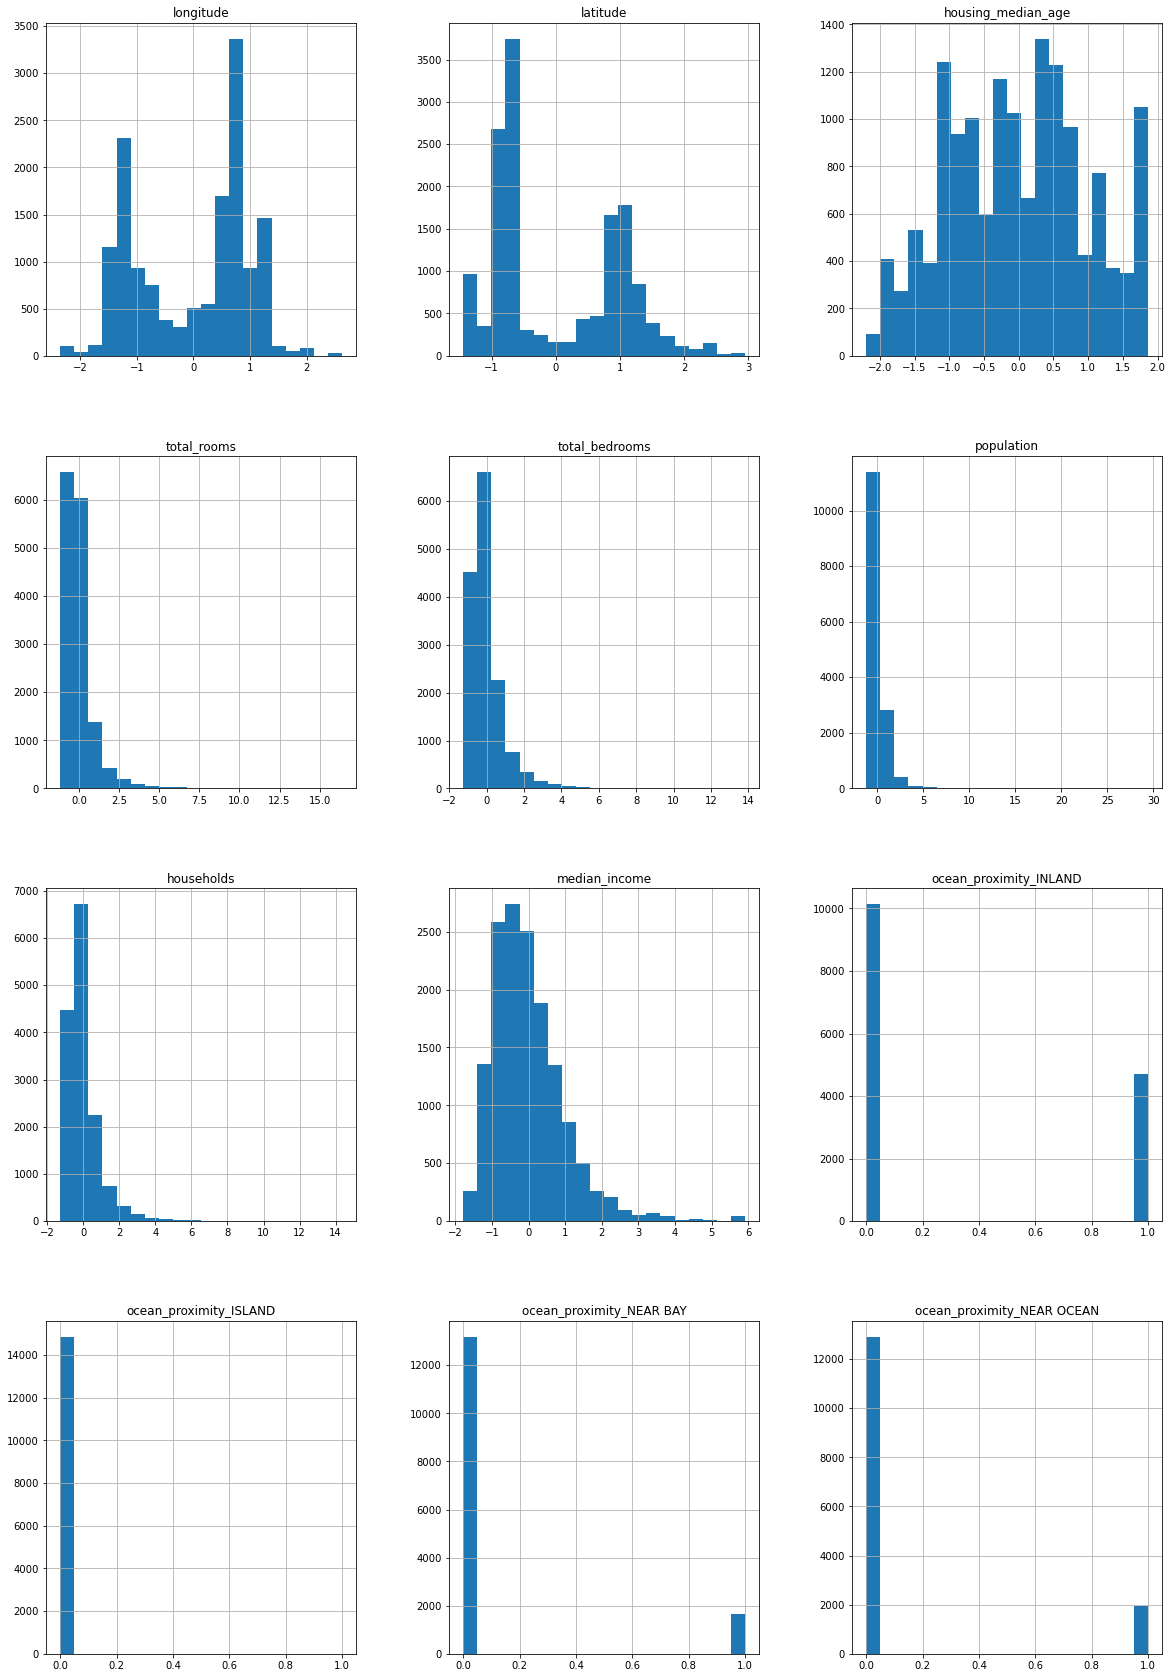

In [27]:
x_train_scaled.hist(bins = 20, figsize=(20,30))
plt.show()

In [28]:
data_4.ocean_proximity.value_counts()

<1H OCEAN     8188
INLAND        5921
NEAR OCEAN    2399
NEAR BAY      2052
ISLAND           5
Name: ocean_proximity, dtype: int64

### Building the models
<br>We will attempt running following type of models:
1. Linear Regression Model (simple regression model)
2. LASSO Regression to remove multi collinearity
3. Decision Trees including Random Forest
4. Deep Learning Model

#### Linear Regression
We will start building the linear regression model. 

In [29]:
import statsmodels.api as sm

In [30]:
x_train_scaled = sm.add_constant(x_train_scaled)
model_1 = sm.OLS(y_train_scaled,x_train_scaled).fit()

In [31]:
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                OLS                  Adj. R-squared:       0.642     
Dependent Variable:   median_house_value   AIC:                  26898.5495
Date:                 2022-07-16 17:04     BIC:                  26997.4261
No. Observations:     14852                Log-Likelihood:       -13436.   
Df Model:             12                   F-statistic:          2222.     
Df Residuals:         14839                Prob (F-statistic):   0.00      
R-squared:            0.642                Scale:                0.35785   
---------------------------------------------------------------------------
                            Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
const                       0.1104   0.0086  12.8507 0.0000  0.0936  0.1273
longitude                  -0.4626   0.0208 -22.2517 0.0000 -0.5033 -0.4218
latitude                   -0.4590   0.0218 -21.0273 0.0000 -0.5018 -0.4162
housing_median_age          0.1216   0.0056  21.5855 0.0000  0.1106  0.1327
total_rooms                -0.1285   0.0181  -7.0836 0.0000 -0.1640 -0.0929
total_bedrooms              0.3533   0.0293  12.0620 0.0000  0.2958  0.4107
population                 -0.3444   0.0122 -28.1447 0.0000 -0.3683 -0.3204
households                  0.1598   0.0285   5.6002 0.0000  0.1039  0.2157
median_income               0.6442   0.0066  98.2127 0.0000  0.6314  0.6571
ocean_proximity_INLAND     -0.3497   0.0178 -19.7017 0.0000 -0.3845 -0.3149
ocean_proximity_ISLAND      1.8741   0.3457   5.4207 0.0000  1.1964  2.5518
ocean_proximity_NEAR BAY   -0.0450   0.0195  -2.3100 0.0209 -0.0833 -0.0068
ocean_proximity_NEAR OCEAN  0.0402   0.0159   2.5236 0.0116  0.0090  0.0714
---------------------------------------------------------------------------
Omnibus:               3610.770         Durbin-Watson:            2.003    
Prob(Omnibus):         0.000            Jarque-Bera (JB):         12102.212
Skew:                  1.218            Prob(JB):                 0.000    
Kurtosis:              6.691            Condition No.:            139      
===========================================================================

"""

<Figure size 720x576 with 0 Axes>

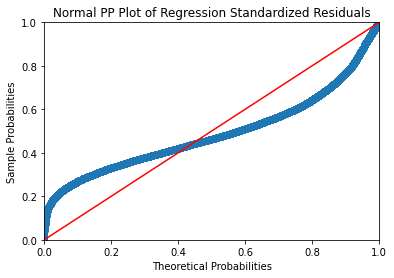

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
house_price_data_resid = model_1.resid
probplot = sm.ProbPlot(house_price_data_resid)
plt.figure(figsize = (10,8))
probplot.ppplot(line = '45')
plt.title('Normal PP Plot of Regression Standardized Residuals')
plt.show()

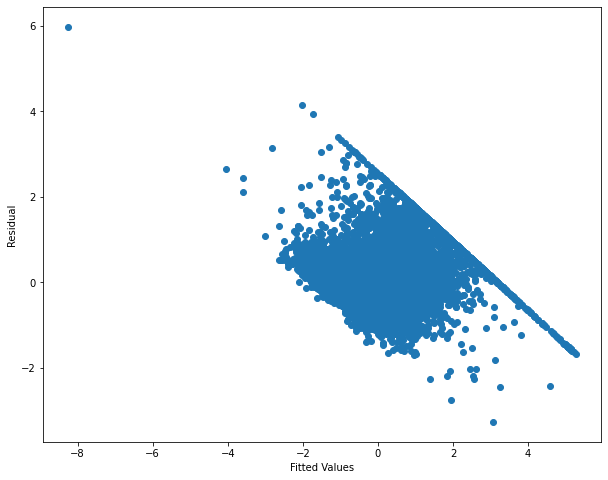

In [33]:
def standardized(vals):
    return((vals-vals.mean())/vals.std())
plt.figure(figsize = (10,8))
plt.scatter(standardized(model_1.fittedvalues),model_1.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.show()

R2 Score 0.6562851179227125


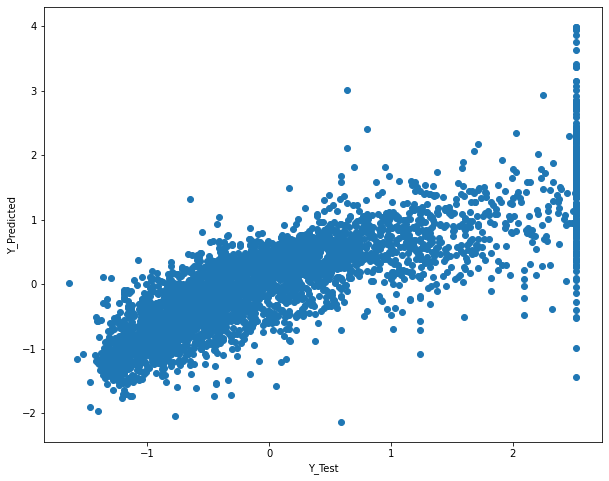

In [34]:
pred = model_1.predict(sm.add_constant(x_test_scaled))
from sklearn.metrics import r2_score
print("R2 Score",r2_score(y_test_scaled,pred))
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,pred)
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

We can see at the higher value of Y_test we can see that there is the regression is not working well, for remaining portion is working fine. 

In [35]:
x_test_scaled.loc[y_test_scaled.median_house_value ==max(y_test_scaled.median_house_value),:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7778,0.579451,-0.819678,0.586981,-0.520912,-0.783181,-0.887316,-0.835889,2.818895,0,0,0,0
16227,-1.234027,0.772163,-0.530527,0.813450,-0.000302,0.069458,0.055394,3.800763,0,0,0,0
3674,0.599657,-0.692141,0.986091,0.469593,0.408371,-0.176869,0.428806,0.223155,0,0,0,0
15322,-1.375469,0.880805,-0.211239,0.468109,-0.061849,-0.014236,0.082650,2.395791,0,0,0,1
14183,-1.466395,1.013065,1.704489,-0.038523,-0.061849,-0.407027,0.060845,0.424637,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10929,1.175525,-0.824401,-1.009459,-1.256616,-1.292791,-1.301031,-1.307424,-0.639534,1,0,0,0
7777,0.579451,-0.819678,0.586981,0.210835,-0.123396,-0.122658,0.000881,1.750294,0,0,0,0
9587,0.882540,-0.975555,0.507159,-0.261659,-0.256338,-0.649549,-0.318018,1.014819,0,0,0,0
8429,-1.521961,1.098089,0.586981,-0.283428,-0.714248,-0.717075,-0.688705,3.481903,0,0,1,0


In [36]:
data_4.loc[data_4.median_house_value == max(data_4.median_house_value),:].ocean_proximity.value_counts()

<1H OCEAN     479
NEAR OCEAN    191
NEAR BAY      172
INLAND         26
Name: ocean_proximity, dtype: int64

In [37]:
data_4.median_house_value.value_counts()

500001    868
137500    112
162500    109
112500     97
187500     87
         ... 
454300      1
365300      1
262200      1
300700      1
47000       1
Name: median_house_value, Length: 3759, dtype: int64

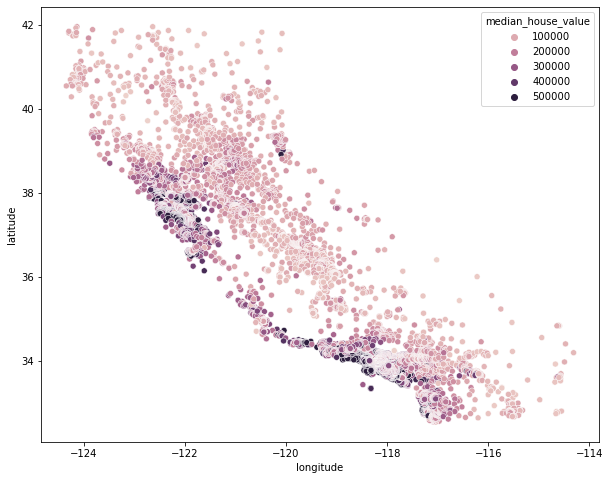

In [38]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.scatterplot(data = data_4,x = 'longitude',y = 'latitude',hue = 'median_house_value')
plt.show()

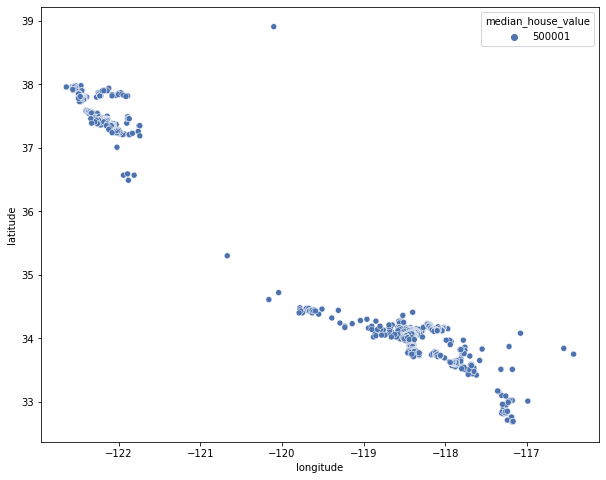

In [39]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = data_4.loc[data_4.median_house_value == max(data_4.median_house_value),:],
               x = 'longitude',y = 'latitude',hue = 'median_house_value',palette="deep")
plt.show()

In [41]:
print(model_1.params)

const                         0.110431
longitude                    -0.462573
latitude                     -0.458970
housing_median_age            0.121636
total_rooms                  -0.128467
total_bedrooms                0.353254
population                   -0.344366
households                    0.159793
median_income                 0.644236
ocean_proximity_INLAND       -0.349717
ocean_proximity_ISLAND        1.874104
ocean_proximity_NEAR BAY     -0.045047
ocean_proximity_NEAR OCEAN    0.040192
dtype: float64


These are the parameters for the model to predict the values of the median house prices. 

In [ ]:
y_pred = model_1.predict()

In [42]:
data_4.median_house_value.value_counts()

500001    868
137500    112
162500    109
112500     97
187500     87
         ... 
454300      1
365300      1
262200      1
300700      1
47000       1
Name: median_house_value, Length: 3759, dtype: int64

In [44]:
data_4.shape

(18565, 10)

In [45]:
868/18565

0.04675464583894425